# Project Name - Brain Tumor MRI Image Classification

## Project Type - Image Classification

## Contribution - Individual

# Project Summary - 


# MRI Brain Tumor Classification with Deep Learning

This project focuses on classifying brain MRI scans to detect the presence of tumors using Convolutional Neural Networks (CNNs) and transfer learning with state-of-the-art models like ResNet50 and EfficientNetB0.

---

## Dataset

The dataset contains MRI brain images categorized into different classes based on tumor type. Images were preprocessed through:
- Resizing to 64×64 pixels
- Normalization to [0, 1]
- Conversion to PyTorch tensors

---

## Models Used

### CustomCNN (v1 & v2)
- Built from scratch using PyTorch
- v2 includes `BatchNorm` and `Dropout` for better regularization

### ResNet50 (Transfer Learning)
- Loaded with pretrained ImageNet weights
- Replaced the final fully-connected layer with a custom head
- Feature extractor frozen for fine-tuning

### EfficientNetB0 (Transfer Learning)
- Lightweight, high-accuracy pretrained model
- Custom classification head for tumor prediction

---

## Training Details
- Loss Function: `CrossEntropyLoss`
- Optimizer: `Adam`
- Epochs: 20
- Metrics: Accuracy, Precision, Recall, F1-Score
- Used `train_dataloader`, `valid_dataloader`, and `test_dataloader` for training pipeline

---

## Evaluation

- Plotted **train/test loss & accuracy curves**
- Computed **confusion matrix** and classification reports
- Created a custom prediction + plotting function:
  - Randomly samples 5 test images
  - Displays predicted class and confidence
  - Shows green title if prediction is correct, red if incorrect

---

# GitHub Link - 

# Problem Statement - 

> This project aims to develop a deep learning-based solution for classifying brain MRI images into multiple categories according to tumor type. It involves building a custom CNN model from scratch and enhancing performance through transfer learning using pretrained models. The project also includes deploying a user-friendly Streamlit web application to enable real-time tumor type predictions from uploaded MRI images.

# Let's Begin !

# 1. Know Your Data

## 1.1 Import Libraries

In [1]:
from pathlib import Path
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy
from PIL import Image
import os

## 1.2 Dataset Loading

In [2]:
data_path = Path("D:\Deepam\Projects")
image_path = data_path / "Brain Tumor MRI Classification"

train_dir = image_path / "train"
test_dir = image_path / "test"
valid_dir = image_path / "valid"

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_15192\1268908926.py:1: SyntaxWarning: invalid escape sequence '\D'
  data_path = Path("D:\Deepam\Projects")


In [3]:
train_dir, test_dir, valid_dir

(WindowsPath('D:/Deepam/Projects/Brain Tumor MRI Classification/train'),
 WindowsPath('D:/Deepam/Projects/Brain Tumor MRI Classification/test'),
 WindowsPath('D:/Deepam/Projects/Brain Tumor MRI Classification/valid'))

In [4]:
image_path

WindowsPath('D:/Deepam/Projects/Brain Tumor MRI Classification')

In [5]:
import os
def walk_through_dir(dir_path):
    """ Walks through dir_path returning its contents."""
    for dir_path, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dir_path}'.")
        
walk_through_dir(image_path)

There are 3 directories and 0 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification'.
There are 4 directories and 1 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\test'.
There are 0 directories and 80 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\test\glioma'.
There are 0 directories and 63 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\test\meningioma'.
There are 0 directories and 49 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\test\no_tumor'.
There are 0 directories and 54 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\test\pituitary'.
There are 4 directories and 1 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\train'.
There are 0 directories and 564 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\train\glioma'.
There are 0 directories and 358 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\train\meningioma'.
There are 0 directories and 335 images in 'D:\Deepam\Proj

## 1.3 Dataset First View

Random image path: D:\Deepam\Projects\Brain Tumor MRI Classification\train\glioma\Tr-gl_0165_jpg.rf.34190c0d5ea41ccc6610363f8369c37e.jpg
Image class: glioma
image height: 640
image width: 640


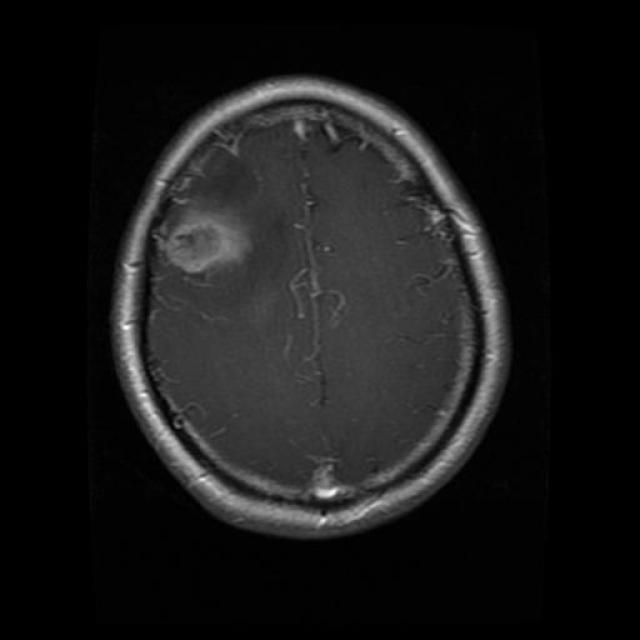

In [6]:
import random 
from PIL import Image

# Set Seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
# print(random_image_path)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored
image_class = random_image_path.parent.stem
# print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
img

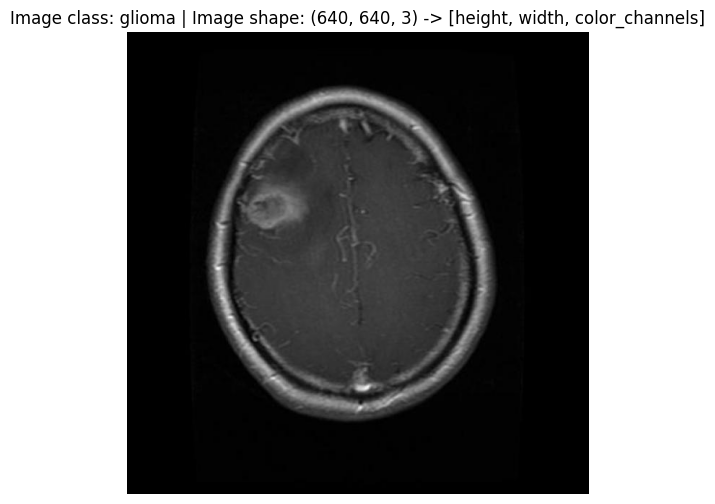

In [7]:
# Trying to visualize the image using matplotlib
import matplotlib.pyplot as plt
import numpy as np

img_as_arr = np.array(img)

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title(f"Image class: {image_class} | Image shape: {img_as_arr.shape} -> [height, width, color_channels]")
plt.axis("OFF");

In [8]:
img_as_arr

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

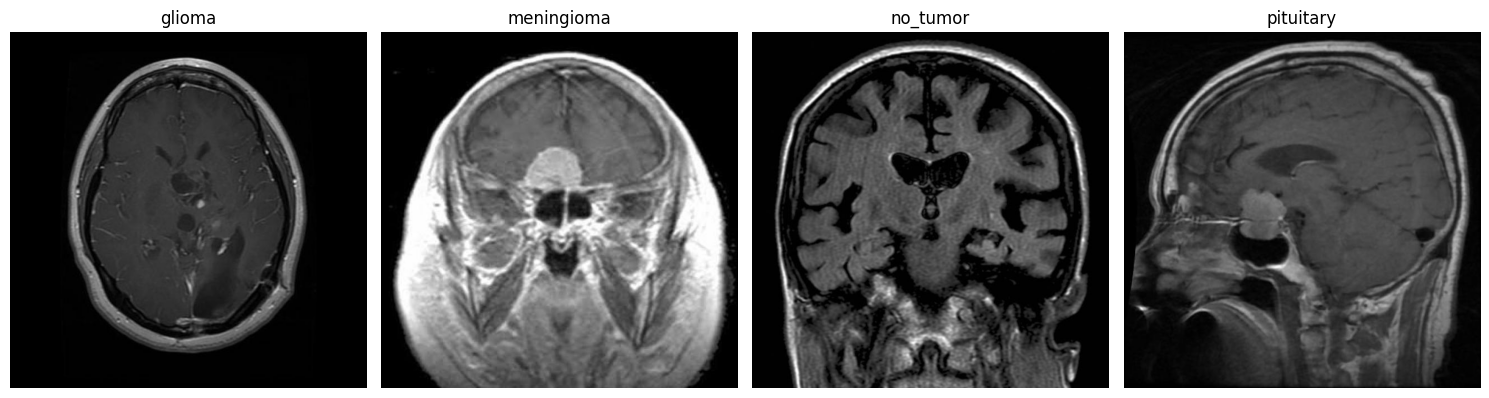

In [9]:
# Visualize each of the tumor types through matplotlib
from pathlib import Path
import random
import matplotlib.pyplot as plt
from PIL import Image

# Base path to your dataset
base_path = image_path / "train"

# Get all class directories under train (glioma, meningioma, pituitary, no_tumor)
class_dirs = [d for d in base_path.iterdir() if d.is_dir()]

# Create subplots: 1 row, len(class_dirs) columns
fig, axes = plt.subplots(1, len(class_dirs), figsize=(15, 10))

# Loop through each class folder
for ax, class_dir in zip(axes, class_dirs):
    # Get all image files inside the class folder
    image_files = list(class_dir.glob("*.jpg"))
    # Randomly choose one
    random_image = random.choice(image_files)
    # Open and display
    img = Image.open(random_image)
    ax.imshow(img)
    ax.set_title(class_dir.name)
    ax.axis("off")

plt.tight_layout()
plt.show()

# 2 Transforming data

In [10]:
import torchvision
from torchvision import transforms

data_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor() # Converts [0,255] to [0,1] and also changes HWC → CHW
])

In [11]:
data_transforms(img)

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0039],
         [0.0078, 0.0118, 0.0118,  ..., 0.0157, 0.0118, 0.0078],
         [0.0118, 0.0196, 0.0157,  ..., 0.0196, 0.0235, 0.0196],
         ...,
         [0.0118, 0.0157, 0.0157,  ..., 0.0118, 0.0157, 0.0157],
         [0.0078, 0.0078, 0.0118,  ..., 0.0157, 0.0157, 0.0118],
         [0.0000, 0.0000, 0.0039,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0039],
         [0.0078, 0.0118, 0.0118,  ..., 0.0157, 0.0118, 0.0078],
         [0.0118, 0.0196, 0.0157,  ..., 0.0196, 0.0235, 0.0196],
         ...,
         [0.0118, 0.0157, 0.0157,  ..., 0.0118, 0.0157, 0.0157],
         [0.0078, 0.0078, 0.0118,  ..., 0.0157, 0.0157, 0.0118],
         [0.0000, 0.0000, 0.0039,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0039],
         [0.0078, 0.0118, 0.0118,  ..., 0.0157, 0.0118, 0.0078],
         [0.0118, 0.0196, 0.0157,  ..., 0.0196, 0.0235, 0.

In [12]:
data_transforms(img).shape

torch.Size([3, 64, 64])

In [13]:
img_as_arr.shape

(640, 640, 3)

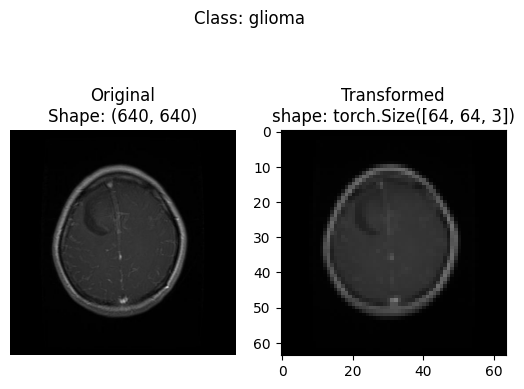

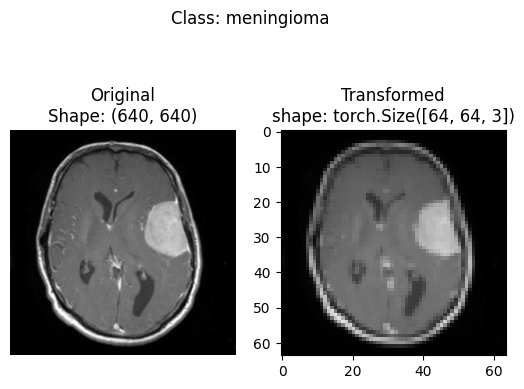

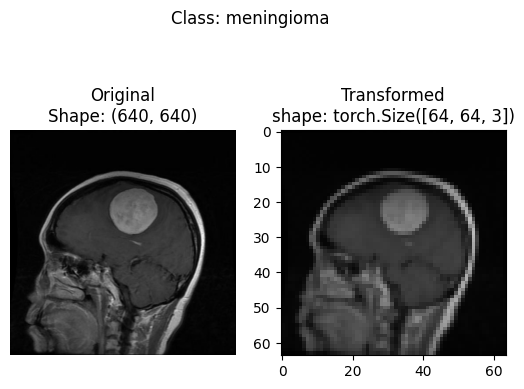

In [14]:
def plot_transformed_image(image_paths: list, transforms, k:int, seed=None):
    """
    Selects random images from a path of images and load/transforms
    them then plots the original vs the transformed version
    """
    if seed:
        random.seed(seed)
    random_image_path_list = random.sample(image_paths, k)
    for image_path in random_image_path_list:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nShape: {f.size}")
            ax[0].axis(False)
    
            transformed_image = transforms(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nshape: {transformed_image.shape}")
            ax[0].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}")
plot_transformed_image(image_path_list, data_transforms, 3, seed=42)

# 3. Loading Image Data using `ImageFolder`

In [15]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transforms,
                                  target_transform=None)

valid_data = datasets.ImageFolder(root=valid_dir,
                                  transform=data_transforms)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transforms)

train_data, valid_data, test_data

(Dataset ImageFolder
     Number of datapoints: 1695
     Root location: D:\Deepam\Projects\Brain Tumor MRI Classification\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 502
     Root location: D:\Deepam\Projects\Brain Tumor MRI Classification\valid
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 246
     Root location: D:\Deepam\Projects\Brain Tumor MRI Classification\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalF

In [16]:
len(train_data),len(valid_data),len(test_data)

(1695, 502, 246)

In [17]:
class_names = train_data.classes
class_names

['glioma', 'meningioma', 'no_tumor', 'pituitary']

In [18]:
class_idx = train_data.class_to_idx
class_idx

{'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}

In [19]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [20]:
img, label = train_data[0]

print(f"image shape: {img.shape}")
print(f"image label: {label}")
print(f"image tensor: {img}")

image shape: torch.Size([3, 64, 64])
image label: 0
image tensor: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


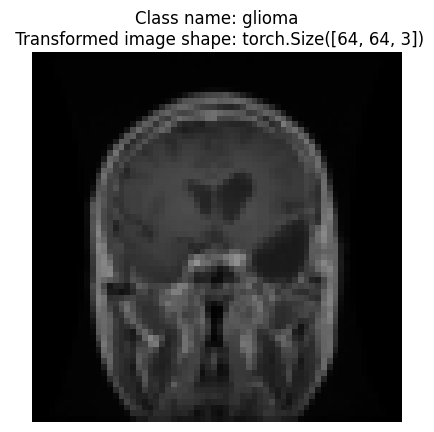

In [21]:
# visualizing the transformed iamge from train data
transformed_img = img.permute(1,2,0)

plt.imshow(transformed_img)
plt.title(f"Class name: {class_names[label]}\n Transformed image shape: {transformed_img.shape}")
plt.axis('off');

## 4.1 Turn Image or Dataset to DataLoaders

In [22]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

valid_dataloader = DataLoader(dataset=valid_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS)

len(train_dataloader), len(valid_dataloader), len(test_dataloader)

(53, 16, 8)

In [23]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64])
Label shape: torch.Size([32])


In [24]:
from typing import List, Tuple, Dict

In [25]:
def display_random_images (dataset:torch.utils.data.dataset,
                           classes: List[str],
                           n: int = 5,
                           display_image: bool = True,
                           seed: int = None):

    if n > 10:
        n = 10
        print(f"Invalid input for n, n should be less than 10 in order to display image")
        display_image = False

    if seed:
        random.seed(seed)
    random_sample_idx = random.sample(range(len(dataset)), n)

    plt.figure(figsize=(16,8))

    for i, targ_sample in enumerate(random_sample_idx):
        targ_img, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        targ_img_adjust = targ_img.permute(1,2,0)

        plt.subplot(1, n, i+1)
        plt.imshow(targ_img_adjust)
        plt.axis(False)
        if classes:
            title = f"Class name: {classes[targ_label]}"
            if display_image:
                title = title + f"\nShape: {targ_img_adjust.shape}"
        plt.title(title)

In [26]:
display_random_images(train_data, class_names, 5,42)

# 5 Model Building

In [27]:
# Setup device agnostic code
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [28]:
class CustomCNN(nn.Module):

    def __init__ (self,
                  input_shape:int,
                  hidden_units:int,
                  output_shape:int):

        super().__init__()
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, 
                      padding=0),
            
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, 
                      padding=0),
            
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),

            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, 
                      padding=0),
            
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2,
                         stride=2)
            
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13,
                      out_features=output_shape),
            
        )

    def forward(self, x):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.classifier(x)
        return x

In [29]:
custom_model_1 = CustomCNN(3, 10, len(class_names)).to(device)
custom_model_1

CustomCNN(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=4, bias=True)
  )
)

## 5.1 Use `torchinfo` to get an idea of the shapes going through our model

In [30]:
# print summary of the model
from torchinfo import summary

In [31]:
summary(custom_model_1, input_size=[32, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
CustomCNN                                [32, 4]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

## 5.3 Creating train and test loop

In [32]:
def train_step(model: torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):

    model.train()

    train_loss, train_acc = 0,0

    for X, y in dataloader:

        X = X.to(device)
        y = y.to(device)

        # 1. forward pass
        y_pred = model(X)

        # 2. calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. backpropagation
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # calculate the acc
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += ((y_pred_class == y).sum().item() / len(y_pred))

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc

In [33]:
def test_step (model: torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               device=device):

    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
    
            # 1. forward pass
            test_pred_logits = model(X)
    
            # 2. calculate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # test accuracy calculation
            test_pred_class = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
            test_acc += ((test_pred_class==y).sum().item() / len(test_pred_class))

        test_loss = test_loss / len(dataloader)
        test_acc = test_acc / len(dataloader)

        return test_loss, test_acc

## 5.4 Combining train and test loop

In [34]:
from tqdm.auto import tqdm

def train(
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,   # NON-DEFAULT
    device=device, 
    loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
    epochs: int = 5
):

    results = {"train_loss" : [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
              }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)

        test_loss, test_acc = test_step(model=model,
                                        dataloader=valid_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

C:\Users\Deepam Shah\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
from timeit import default_timer as timer

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

custom_model_1 = CustomCNN(3, 10, len(class_names)).to(device)

epochs = 20
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=custom_model_1.parameters(),
                             lr = 0.001)
start_time = timer()

custom_model_1_results = train(custom_model_1,
                               train_dataloader = train_dataloader,
                               test_dataloader = valid_dataloader,
                               optimizer=optimizer,
                               loss_fn=loss_fn,
                               epochs=epochs)

end_time = timer()

total_time = end_time - start_time
print(f"Total time take {total_time:.3f} seconds")

  5%|▌         | 1/20 [00:40<12:41, 40.06s/it]

Epoch: 1 | Train Loss: 1.2688 | Train acc: 0.4065 | Test Loss: 1.0219 | Test acc: 0.5474


 10%|█         | 2/20 [00:50<06:47, 22.63s/it]

Epoch: 2 | Train Loss: 0.9263 | Train acc: 0.6047 | Test Loss: 0.8539 | Test acc: 0.6518


 15%|█▌        | 3/20 [01:01<04:51, 17.17s/it]

Epoch: 3 | Train Loss: 0.7782 | Train acc: 0.7009 | Test Loss: 0.6980 | Test acc: 0.7191


 20%|██        | 4/20 [01:10<03:48, 14.26s/it]

Epoch: 4 | Train Loss: 0.6462 | Train acc: 0.7576 | Test Loss: 0.5943 | Test acc: 0.7757


 25%|██▌       | 5/20 [01:20<03:07, 12.53s/it]

Epoch: 5 | Train Loss: 0.5729 | Train acc: 0.7817 | Test Loss: 0.6181 | Test acc: 0.7472


 30%|███       | 6/20 [01:30<02:42, 11.61s/it]

Epoch: 6 | Train Loss: 0.5527 | Train acc: 0.7882 | Test Loss: 0.6002 | Test acc: 0.7628


 35%|███▌      | 7/20 [01:39<02:22, 10.94s/it]

Epoch: 7 | Train Loss: 0.5300 | Train acc: 0.8083 | Test Loss: 0.5967 | Test acc: 0.7667


 40%|████      | 8/20 [01:49<02:05, 10.49s/it]

Epoch: 8 | Train Loss: 0.5154 | Train acc: 0.8147 | Test Loss: 0.5621 | Test acc: 0.7901


 45%|████▌     | 9/20 [01:59<01:52, 10.25s/it]

Epoch: 9 | Train Loss: 0.4806 | Train acc: 0.8295 | Test Loss: 0.5645 | Test acc: 0.7862


 50%|█████     | 10/20 [02:08<01:40, 10.06s/it]

Epoch: 10 | Train Loss: 0.4843 | Train acc: 0.8206 | Test Loss: 0.6015 | Test acc: 0.7745


 55%|█████▌    | 11/20 [02:18<01:29,  9.95s/it]

Epoch: 11 | Train Loss: 0.4669 | Train acc: 0.8331 | Test Loss: 0.5466 | Test acc: 0.8097


 60%|██████    | 12/20 [02:28<01:18,  9.86s/it]

Epoch: 12 | Train Loss: 0.4724 | Train acc: 0.8426 | Test Loss: 0.5351 | Test acc: 0.7951


 65%|██████▌   | 13/20 [02:37<01:08,  9.84s/it]

Epoch: 13 | Train Loss: 0.4427 | Train acc: 0.8384 | Test Loss: 0.5312 | Test acc: 0.8088


 70%|███████   | 14/20 [02:47<00:59,  9.85s/it]

Epoch: 14 | Train Loss: 0.4318 | Train acc: 0.8501 | Test Loss: 0.5683 | Test acc: 0.7862


 75%|███████▌  | 15/20 [02:57<00:48,  9.79s/it]

Epoch: 15 | Train Loss: 0.4409 | Train acc: 0.8419 | Test Loss: 0.5053 | Test acc: 0.8107


 80%|████████  | 16/20 [03:06<00:38,  9.73s/it]

Epoch: 16 | Train Loss: 0.4263 | Train acc: 0.8431 | Test Loss: 0.5226 | Test acc: 0.8214


 85%|████████▌ | 17/20 [03:17<00:29,  9.87s/it]

Epoch: 17 | Train Loss: 0.4125 | Train acc: 0.8430 | Test Loss: 0.4943 | Test acc: 0.8294


 90%|█████████ | 18/20 [03:26<00:19,  9.80s/it]

Epoch: 18 | Train Loss: 0.3926 | Train acc: 0.8690 | Test Loss: 0.5177 | Test acc: 0.7988


 95%|█████████▌| 19/20 [03:36<00:09,  9.72s/it]

Epoch: 19 | Train Loss: 0.4055 | Train acc: 0.8502 | Test Loss: 0.5372 | Test acc: 0.8136


100%|██████████| 20/20 [03:46<00:00, 11.31s/it]

Epoch: 20 | Train Loss: 0.3945 | Train acc: 0.8702 | Test Loss: 0.4832 | Test acc: 0.8216
Total time take 226.249 seconds


In [37]:
custom_model_1_results

{'train_loss': [1.2687911312535125,
  0.9262967177157132,
  0.778218890136143,
  0.6462165657079445,
  0.5729338571710406,
  0.5526614520909652,
  0.5299554942351468,
  0.5153679594678698,
  0.48057223940795324,
  0.4842850138556282,
  0.46685726659477883,
  0.47244099626001324,
  0.4426624578125072,
  0.4318457763150053,
  0.44088734348989883,
  0.42634488051792363,
  0.41250005561225817,
  0.3926196522870154,
  0.40551243160130845,
  0.394470585123548],
 'train_acc': [0.40651628119293975,
  0.6046675289105296,
  0.7009091600730372,
  0.7575509738283627,
  0.7816874619598296,
  0.7882113511868533,
  0.808334601339014,
  0.8147253499695678,
  0.8294849360925136,
  0.8206215763846622,
  0.8330987522824103,
  0.8425517346317711,
  0.8383863359707852,
  0.8501027084601339,
  0.8418860316494218,
  0.8431223371880706,
  0.8430082166768107,
  0.8689516129032258,
  0.8501597687157638,
  0.8701879184418746],
 'test_loss': [1.0219056587666273,
  0.8538904963061213,
  0.6979908738285303,
  0.594

## 5.5 Plot the loss curves of custom_model_1

In [38]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """ Plots training curves of a results dictionary."""
    # Get the loss values of the results dictionary(training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15,7))

    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    plt.show()

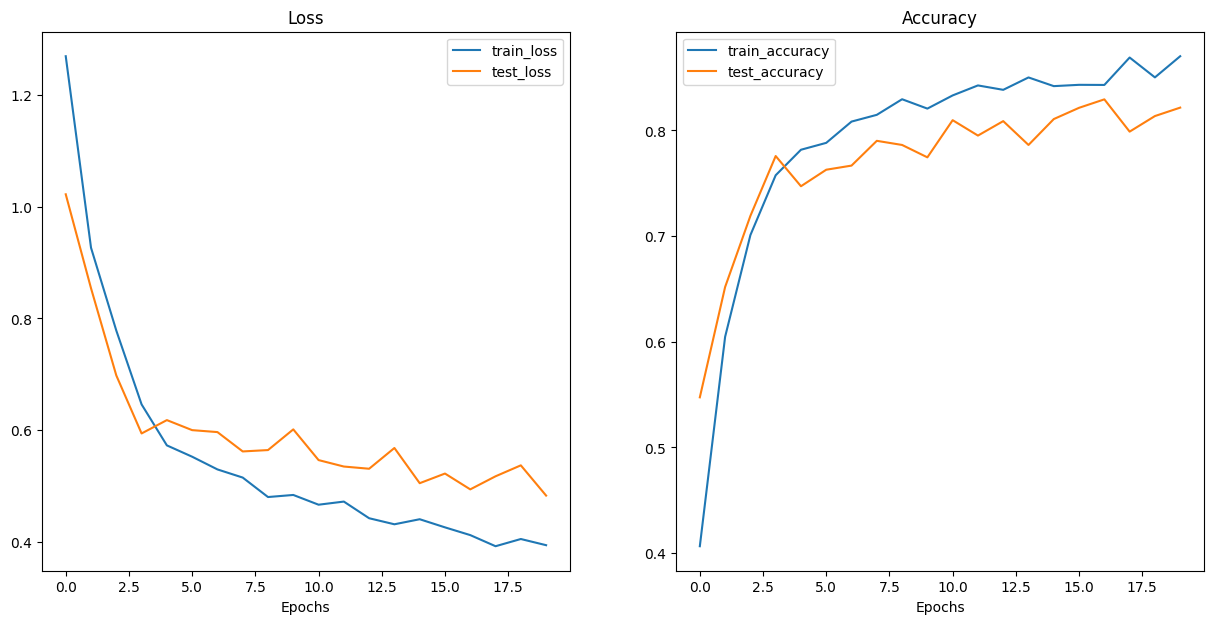

In [39]:
plot_loss_curves(custom_model_1_results)

# 6 Evaluating model using metrics like accuracy, precision, recall, F1-score, and confusion matrix.

In [40]:
import sklearn

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [42]:
all_preds = []
all_labels = []

custom_model_1.eval()
with torch.inference_mode():
    for images, labels in valid_dataloader:
        y_pred = custom_model_1(images.to(device))
        pred_label = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        all_preds.extend(pred_label.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

## 6.1 Calculating Accuracy_score, Precision, Recall and F1_score

In [43]:
# Accuracy
accuracy = accuracy_score(all_labels, all_preds)

# Precision, Recall, F1
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")

Accuracy : 81.67%
Precision: 81.84%
Recall   : 81.67%
F1 Score : 81.73%


## 6.2 plotting confusion matrix

In [44]:
import seaborn as sns
# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plotting it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# 7. Creating another CustomCNN class by adding BatchNorm and Dropout layers

In [45]:
class CustomCNN2(nn.Module):

    def __init__ (self,
                  input_shape:int,
                  hidden_units:int,
                  output_shape:int):

        super().__init__()
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, 
                      padding=0),
            
            nn.BatchNorm2d(hidden_units), # Adding batch normalization
            nn.ReLU(),
            nn.Dropout(p=0.25),     # Adding, dropout in conv layer

            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, 
                      padding=0),
            
            nn.BatchNorm2d(hidden_units), # Adding batch normalization
            nn.ReLU(),
            nn.Dropout(p=0.25),     # Adding, dropout in conv layer
            
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            
            nn.BatchNorm2d(hidden_units), # Adding batch normalization
            nn.ReLU(),
            nn.Dropout(p=0.25),     # Adding, dropout in conv layer

            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, 
                      padding=0),
            
            nn.BatchNorm2d(hidden_units), # Adding batch normalization
            nn.ReLU(),
            nn.Dropout(p=0.25),     # Adding, dropout in conv layer

            nn.MaxPool2d(kernel_size=2,
                         stride=2)
            
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 13 * 13, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, output_shape)  # Final layer = no activation if using CrossEntropyLoss
        )


    def forward(self, x):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.classifier(x)
        return x

In [46]:
custom_model_2 = CustomCNN2(3, 10, len(class_names)).to(device)
custom_model_2

CustomCNN2(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.25, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.25, inplace=False)
    (8): MaxPool2d(kernel

## 7.1 Use `torchinfo` to get an idea of the shapes going through our model

In [47]:
from torchinfo import summary
summary(custom_model_2, input_size=[32, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
CustomCNN2                               [32, 4]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─BatchNorm2d: 2-2                  [32, 10, 62, 62]          20
│    └─ReLU: 2-3                         [32, 10, 62, 62]          --
│    └─Dropout: 2-4                      [32, 10, 62, 62]          --
│    └─Conv2d: 2-5                       [32, 10, 60, 60]          910
│    └─BatchNorm2d: 2-6                  [32, 10, 60, 60]          20
│    └─ReLU: 2-7                         [32, 10, 60, 60]          --
│    └─Dropout: 2-8                      [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-9                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-10                      [32, 10, 28, 28]          910
│    └─Batch

## 7.2 Using train step() function to train custom_model_2

In [48]:
from timeit import default_timer as timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

custom_model_2 = CustomCNN(3, 10, len(class_names)).to(device)

epochs = 20
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=custom_model_2.parameters(),
                             lr = 0.001)
start_time = timer()

custom_model_2_results = train(custom_model_2,
                               train_dataloader = train_dataloader,
                               test_dataloader = valid_dataloader,
                               optimizer=optimizer,
                               loss_fn=loss_fn,
                               epochs=epochs)

end_time = timer()

total_time = end_time - start_time
print(f"Total time take {total_time:.3f} seconds")

  5%|▌         | 1/20 [00:10<03:15, 10.30s/it]

Epoch: 1 | Train Loss: 1.2687 | Train acc: 0.4065 | Test Loss: 1.0219 | Test acc: 0.5474


 10%|█         | 2/20 [00:20<02:59,  9.98s/it]

Epoch: 2 | Train Loss: 0.9263 | Train acc: 0.6058 | Test Loss: 0.8533 | Test acc: 0.6518


 15%|█▌        | 3/20 [00:29<02:45,  9.76s/it]

Epoch: 3 | Train Loss: 0.7794 | Train acc: 0.7009 | Test Loss: 0.7026 | Test acc: 0.7191


 20%|██        | 4/20 [00:39<02:37,  9.85s/it]

Epoch: 4 | Train Loss: 0.6466 | Train acc: 0.7576 | Test Loss: 0.5939 | Test acc: 0.7757


 25%|██▌       | 5/20 [00:49<02:27,  9.83s/it]

Epoch: 5 | Train Loss: 0.5734 | Train acc: 0.7811 | Test Loss: 0.6200 | Test acc: 0.7472


 30%|███       | 6/20 [00:59<02:19,  9.96s/it]

Epoch: 6 | Train Loss: 0.5532 | Train acc: 0.7912 | Test Loss: 0.6045 | Test acc: 0.7569


 35%|███▌      | 7/20 [01:09<02:08,  9.92s/it]

Epoch: 7 | Train Loss: 0.5311 | Train acc: 0.8060 | Test Loss: 0.5981 | Test acc: 0.7647


 40%|████      | 8/20 [01:19<01:57,  9.83s/it]

Epoch: 8 | Train Loss: 0.5165 | Train acc: 0.8159 | Test Loss: 0.5711 | Test acc: 0.7882


 45%|████▌     | 9/20 [01:28<01:47,  9.73s/it]

Epoch: 9 | Train Loss: 0.4812 | Train acc: 0.8295 | Test Loss: 0.5662 | Test acc: 0.7862


 50%|█████     | 10/20 [01:38<01:36,  9.67s/it]

Epoch: 10 | Train Loss: 0.4854 | Train acc: 0.8212 | Test Loss: 0.6003 | Test acc: 0.7745


 55%|█████▌    | 11/20 [01:47<01:26,  9.61s/it]

Epoch: 11 | Train Loss: 0.4648 | Train acc: 0.8361 | Test Loss: 0.5476 | Test acc: 0.8136


 60%|██████    | 12/20 [01:57<01:16,  9.60s/it]

Epoch: 12 | Train Loss: 0.4730 | Train acc: 0.8426 | Test Loss: 0.5364 | Test acc: 0.7951


 65%|██████▌   | 13/20 [02:06<01:06,  9.53s/it]

Epoch: 13 | Train Loss: 0.4450 | Train acc: 0.8390 | Test Loss: 0.5335 | Test acc: 0.8029


 70%|███████   | 14/20 [02:15<00:57,  9.52s/it]

Epoch: 14 | Train Loss: 0.4344 | Train acc: 0.8513 | Test Loss: 0.5703 | Test acc: 0.7901


 75%|███████▌  | 15/20 [02:25<00:47,  9.50s/it]

Epoch: 15 | Train Loss: 0.4426 | Train acc: 0.8413 | Test Loss: 0.5071 | Test acc: 0.8127


 80%|████████  | 16/20 [02:34<00:37,  9.49s/it]

Epoch: 16 | Train Loss: 0.4278 | Train acc: 0.8443 | Test Loss: 0.5206 | Test acc: 0.8194


 85%|████████▌ | 17/20 [02:44<00:28,  9.52s/it]

Epoch: 17 | Train Loss: 0.4118 | Train acc: 0.8471 | Test Loss: 0.4944 | Test acc: 0.8313


 90%|█████████ | 18/20 [02:54<00:19,  9.62s/it]

Epoch: 18 | Train Loss: 0.3946 | Train acc: 0.8625 | Test Loss: 0.5224 | Test acc: 0.7999


 95%|█████████▌| 19/20 [03:03<00:09,  9.60s/it]

Epoch: 19 | Train Loss: 0.4097 | Train acc: 0.8455 | Test Loss: 0.5396 | Test acc: 0.8077


100%|██████████| 20/20 [03:13<00:00,  9.67s/it]

Epoch: 20 | Train Loss: 0.3949 | Train acc: 0.8708 | Test Loss: 0.4915 | Test acc: 0.8079
Total time take 193.343 seconds


## 7.3 Plot the loss curves of custom_model_2

In [49]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """ Plots training curves of a results dictionary."""
    # Get the loss values of the results dictionary(training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15,7))

    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    plt.show()

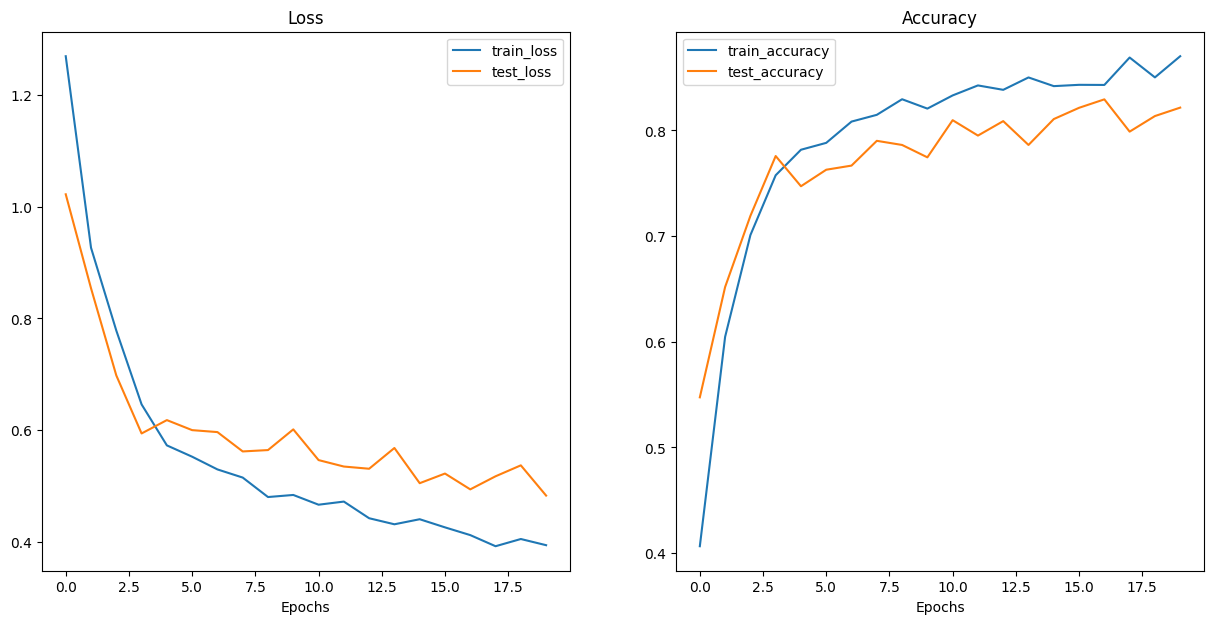

In [50]:
plot_loss_curves(custom_model_1_results)

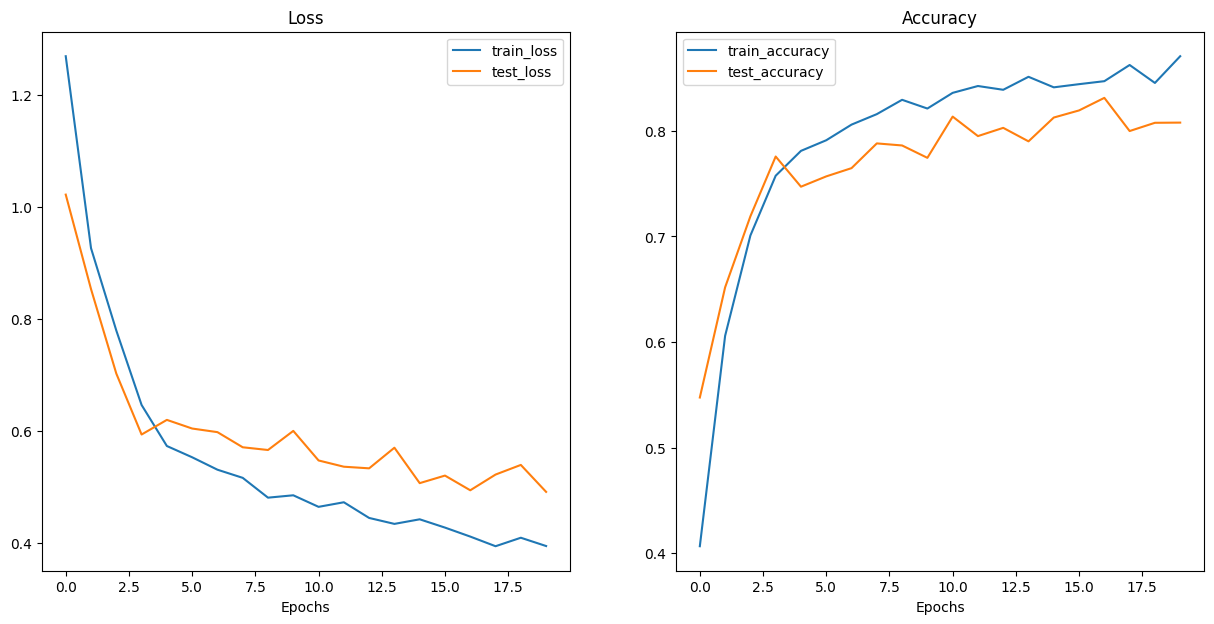

In [51]:
plot_loss_curves(custom_model_2_results)

## Note:-**custom_model_2** didn't help us to improve accuracy but, it reduced overfitting a bit.

## 7.3 Calculating Accuracy_score, Precision, Recall and F1_score

In [52]:
all_preds = []
all_labels = []

custom_model_2.eval()
with torch.inference_mode():
    for images, labels in valid_dataloader:
        y_pred = custom_model_2(images.to(device))
        pred_label = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        all_preds.extend(pred_label.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [53]:
# Accuracy
accuracy = accuracy_score(all_labels, all_preds)

# Precision, Recall, F1
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")

Accuracy : 81.08%
Precision: 81.66%
Recall   : 81.08%
F1 Score : 81.28%


## 7.4 plotting confusion matrix

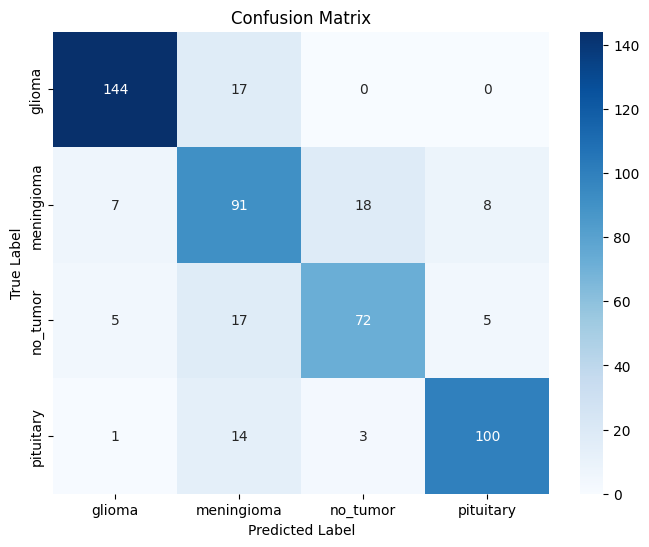

In [54]:
import seaborn as sns
# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plotting it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 8. Making random prediction from test dataset

In [55]:
import os
import random
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [100]:
def pred_and_plot_image(model, image_path, class_names, k=5, image_size=(64, 64), seed=None):
    """
    Predicts and plots `k` random images from the specified folder with model predictions and probabilities.
    
    Parameters:
    - model: Trained PyTorch model
    - image_path: Folder path containing test images
    - class_names: List of class names
    - k: Number of images to randomly pick (max 5)
    - image_size: Size to resize images to (default 224x224)
    - Green title if prediction is correct
    - Red title if prediction is incorrect
    """

    assert k <= 5, "k must be 5 or less."
    if seed:
        random.seed(seed)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    model.to(device)

    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor()
    ])

    # Collecting image files recursively
    image_files = []
    for root, _, files in os.walk(image_path):
        for f in files:
            if f.lower().endswith(('.jpg')):
                image_files.append(os.path.join(root, f))

    if len(image_files) < k:
        raise ValueError(f"Only found {len(image_files)} images, but k={k}")

    random_images = random.sample(image_files, k)

    plt.figure(figsize=(5 * k, 5))

    for idx, img_path in enumerate(random_images):
        # Infer true label from parent directory
        true_label = os.path.basename(os.path.dirname(img_path))

        img = Image.open(img_path).convert("RGB")
        input_tensor = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            probs = torch.softmax(output, dim=1)
            pred_idx = torch.argmax(probs, dim=1).item()
            pred_prob = probs[0][pred_idx].item()

        predicted_label = class_names[pred_idx]

        # Set color based on correctness
        color = "green" if predicted_label.lower() == true_label.lower() else "red"

        plt.subplot(1, k, idx + 1)
        plt.imshow(img)
        plt.title(f"Pred: {predicted_label} | Prob: {pred_prob:.3f}", fontsize=22, color=color)
        plt.axis("off")

    plt.tight_layout(pad=2.0)
    plt.show()

In [101]:
image_path = r'D:\Deepam\Projects\Brain Tumor MRI Classification\test'

## 8.1 Prediction via custom_model_1

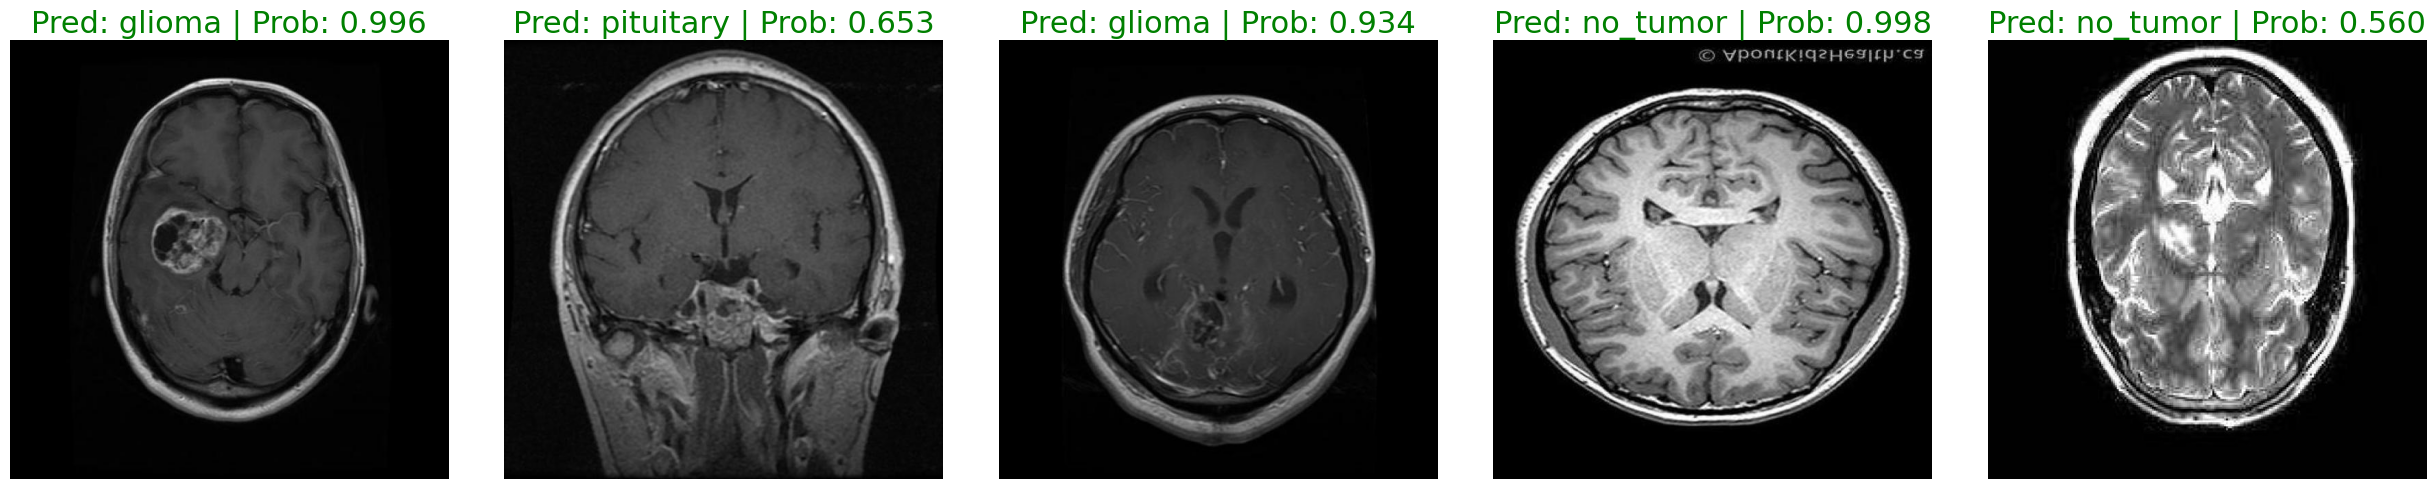

In [83]:
pred_and_plot_image(custom_model_1, image_path, class_names, k=5, seed=200)

## 8.2 Prediction via custom_model_2

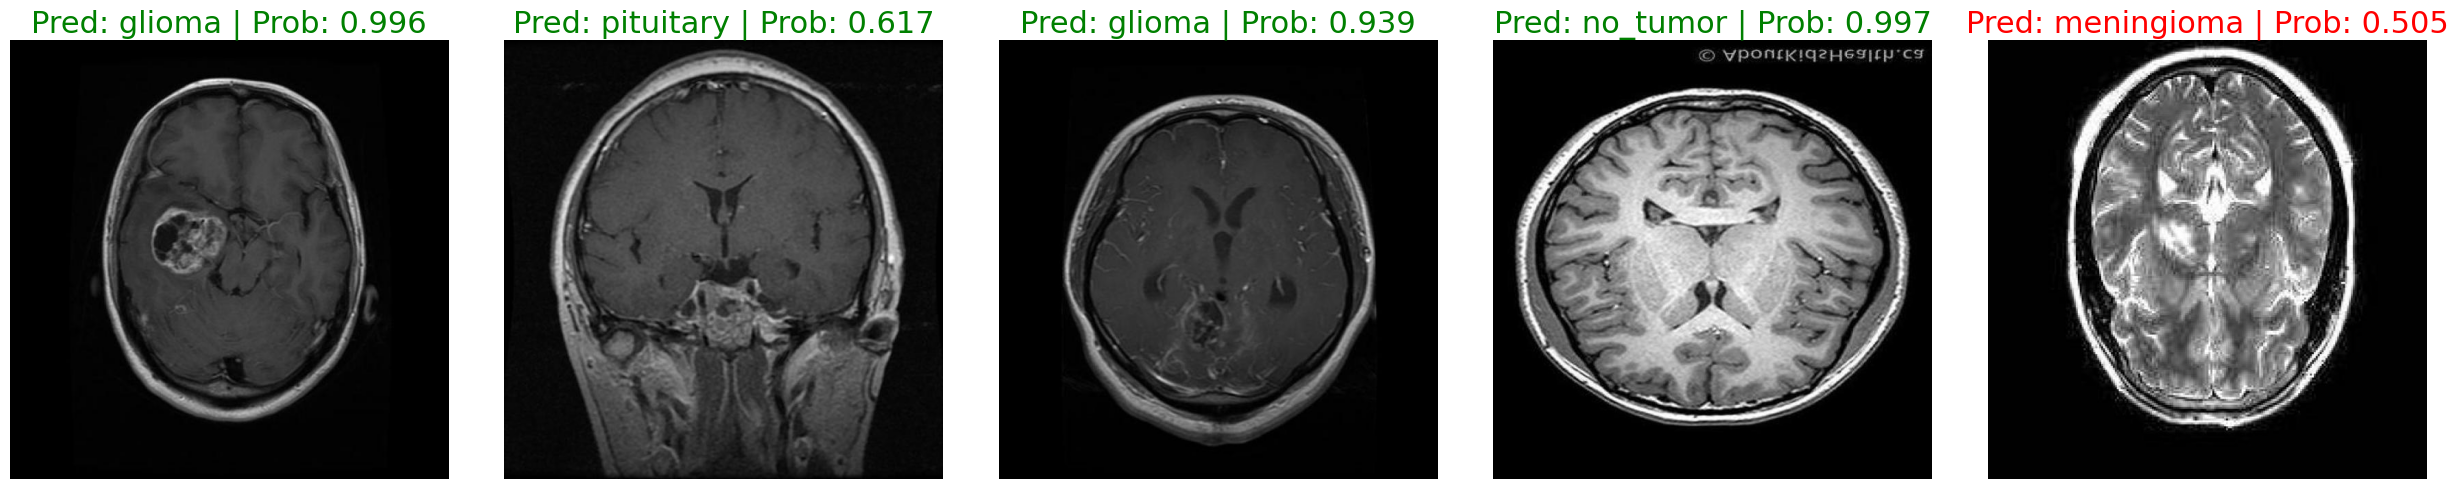

In [84]:
pred_and_plot_image(custom_model_2, image_path, class_names, k=5, seed=200)

# 9. Transfer Learning - Part-1 (ResNet50)

In [60]:
import torch
import torchvision

## 9.1 Setting up Pretrained Model

In [61]:
weights = torchvision.models.ResNet50_Weights.DEFAULT # .DEFAULT best possible available weights
pretrained_model_resnet50 = torchvision.models.resnet50(weights=weights).to(device)
pretrained_model_resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## 9.2 Getting a summary of our model with `torchinfo.summary()`

In [75]:
# Print with torchinfo
from torchinfo import summary

summary(model=pretrained_model_resnet50,
        input_size=(1,3,224,224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [1, 3, 224, 224]     [1, 1000]            --                   True
├─Conv2d (conv1)                         [1, 3, 224, 224]     [1, 64, 112, 112]    9,408                True
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]    [1, 64, 112, 112]    128                  True
├─ReLU (relu)                            [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [1, 64, 56, 56]      [1, 256, 56, 56]     --                   True
│    └─Bottleneck (0)                    [1, 64, 56, 56]      [1, 256, 56, 56]     --                   True
│    │    └─Conv2d (conv1)               [1, 64, 56, 56]      [1, 64, 56, 56]      4,096                True
│    │    └─BatchN

## 9.3 Freezing the base model and changing the output layer

In [85]:
# Freeze all the layers first
for params in pretrained_model_resnet50.parameters():
    params.requires_grad = False

# Unfreeze fully connected layer
for params in pretrained_model_resnet50.fc.parameters():
    params.requires_grad = True

In [88]:
# Rebuilding fc layer accourding to our type

pretrained_model_resnet50.fc = nn.Sequential(
    nn.Dropout(p=0.25),
    nn.Linear(in_features=2048, out_features=len(class_names))
).to(device)
pretrained_model_resnet50.fc

Sequential(
  (0): Dropout(p=0.25, inplace=False)
  (1): Linear(in_features=2048, out_features=4, bias=True)
)

In [89]:
summary(model=pretrained_model_resnet50,
        input_size=(1,3,224,224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [1, 3, 224, 224]     [1, 4]               --                   Partial
├─Conv2d (conv1)                         [1, 3, 224, 224]     [1, 64, 112, 112]    (9,408)              False
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]    [1, 64, 112, 112]    (128)                False
├─ReLU (relu)                            [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [1, 64, 56, 56]      [1, 256, 56, 56]     --                   False
│    └─Bottleneck (0)                    [1, 64, 56, 56]      [1, 256, 56, 56]     --                   False
│    │    └─Conv2d (conv1)               [1, 64, 56, 56]      [1, 64, 56, 56]      (4,096)              False
│    │    

## 9.4 Train Model

In [91]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(pretrained_model_resnet50.parameters(), lr=0.001)

In [93]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
pretrained_model_resnet50_results =  train(model=pretrained_model_resnet50,
                                           train_dataloader=train_dataloader,
                                           test_dataloader=valid_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           epochs=20,
                                           device=device)

# ENd the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time - start_time:.3f} seconds")

  5%|▌         | 1/20 [00:27<08:46, 27.73s/it]

Epoch: 1 | Train Loss: 0.5546 | Train acc: 0.8271 | Test Loss: 0.6822 | Test acc: 0.7514


 10%|█         | 2/20 [00:53<08:00, 26.68s/it]

Epoch: 2 | Train Loss: 0.5446 | Train acc: 0.8324 | Test Loss: 0.6288 | Test acc: 0.7670


 15%|█▌        | 3/20 [01:20<07:33, 26.67s/it]

Epoch: 3 | Train Loss: 0.5141 | Train acc: 0.8389 | Test Loss: 0.6331 | Test acc: 0.7757


 20%|██        | 4/20 [01:47<07:07, 26.72s/it]

Epoch: 4 | Train Loss: 0.5049 | Train acc: 0.8342 | Test Loss: 0.6651 | Test acc: 0.7772


 25%|██▌       | 5/20 [02:13<06:36, 26.42s/it]

Epoch: 5 | Train Loss: 0.5657 | Train acc: 0.7971 | Test Loss: 0.6235 | Test acc: 0.7924


 30%|███       | 6/20 [02:40<06:15, 26.85s/it]

Epoch: 6 | Train Loss: 0.5475 | Train acc: 0.8077 | Test Loss: 0.6186 | Test acc: 0.7710


 35%|███▌      | 7/20 [03:05<05:41, 26.30s/it]

Epoch: 7 | Train Loss: 0.5376 | Train acc: 0.8017 | Test Loss: 0.6013 | Test acc: 0.8020


 40%|████      | 8/20 [03:31<05:12, 26.07s/it]

Epoch: 8 | Train Loss: 0.5423 | Train acc: 0.7971 | Test Loss: 0.5749 | Test acc: 0.7844


 45%|████▌     | 9/20 [03:57<04:48, 26.20s/it]

Epoch: 9 | Train Loss: 0.5304 | Train acc: 0.8117 | Test Loss: 0.5833 | Test acc: 0.7887


 50%|█████     | 10/20 [04:23<04:18, 25.89s/it]

Epoch: 10 | Train Loss: 0.4994 | Train acc: 0.8331 | Test Loss: 0.5875 | Test acc: 0.7866


 55%|█████▌    | 11/20 [04:49<03:55, 26.11s/it]

Epoch: 11 | Train Loss: 0.4882 | Train acc: 0.8295 | Test Loss: 0.5926 | Test acc: 0.7749


 60%|██████    | 12/20 [05:17<03:32, 26.62s/it]

Epoch: 12 | Train Loss: 0.4662 | Train acc: 0.8395 | Test Loss: 0.5663 | Test acc: 0.8050


 65%|██████▌   | 13/20 [05:43<03:04, 26.33s/it]

Epoch: 13 | Train Loss: 0.4660 | Train acc: 0.8377 | Test Loss: 0.5528 | Test acc: 0.8137


 70%|███████   | 14/20 [06:08<02:35, 25.89s/it]

Epoch: 14 | Train Loss: 0.4608 | Train acc: 0.8425 | Test Loss: 0.6090 | Test acc: 0.7642


 75%|███████▌  | 15/20 [06:34<02:10, 26.00s/it]

Epoch: 15 | Train Loss: 0.4782 | Train acc: 0.8248 | Test Loss: 0.5751 | Test acc: 0.7956


 80%|████████  | 16/20 [07:00<01:44, 26.15s/it]

Epoch: 16 | Train Loss: 0.4241 | Train acc: 0.8507 | Test Loss: 0.5517 | Test acc: 0.7983


 85%|████████▌ | 17/20 [07:27<01:18, 26.23s/it]

Epoch: 17 | Train Loss: 0.4525 | Train acc: 0.8449 | Test Loss: 0.5395 | Test acc: 0.8207


 90%|█████████ | 18/20 [07:53<00:52, 26.27s/it]

Epoch: 18 | Train Loss: 0.4471 | Train acc: 0.8478 | Test Loss: 0.5634 | Test acc: 0.7905


 95%|█████████▌| 19/20 [08:19<00:26, 26.29s/it]

Epoch: 19 | Train Loss: 0.4569 | Train acc: 0.8336 | Test Loss: 0.5582 | Test acc: 0.8178


100%|██████████| 20/20 [08:46<00:00, 26.33s/it]

Epoch: 20 | Train Loss: 0.4435 | Train acc: 0.8442 | Test Loss: 0.5151 | Test acc: 0.8255
[INFO] Total training time: 526.610 seconds


In [94]:
pretrained_model_resnet50_results

{'train_loss': [0.5546147221664213,
  0.5446300529084116,
  0.5140701869748673,
  0.5048994556912836,
  0.5657187599056172,
  0.547525445245347,
  0.5375667169408979,
  0.5423282199310806,
  0.530391941093049,
  0.49940086929303296,
  0.48822206596158585,
  0.466212142188594,
  0.46599755197201137,
  0.46078780012310677,
  0.4782244068271709,
  0.42410262716266345,
  0.4525394670243533,
  0.44713751296952087,
  0.4569020833609239,
  0.44349564049603807],
 'train_acc': [0.8271074254412659,
  0.8324330493000608,
  0.8388998782714546,
  0.8342019172245891,
  0.7970556908094948,
  0.8076688983566646,
  0.8016775715155204,
  0.7970937309799148,
  0.8117391965916008,
  0.8330797321972003,
  0.8295419963481437,
  0.839527541083384,
  0.8377396530736457,
  0.8424566342057213,
  0.8247869750456481,
  0.8507303712720633,
  0.8448721850273889,
  0.8477822580645161,
  0.8336122945830797,
  0.8442064820450396],
 'test_loss': [0.6821896638721228,
  0.6287621194496751,
  0.6331036798655987,
  0.66509

## 9.5 Plot loss curves

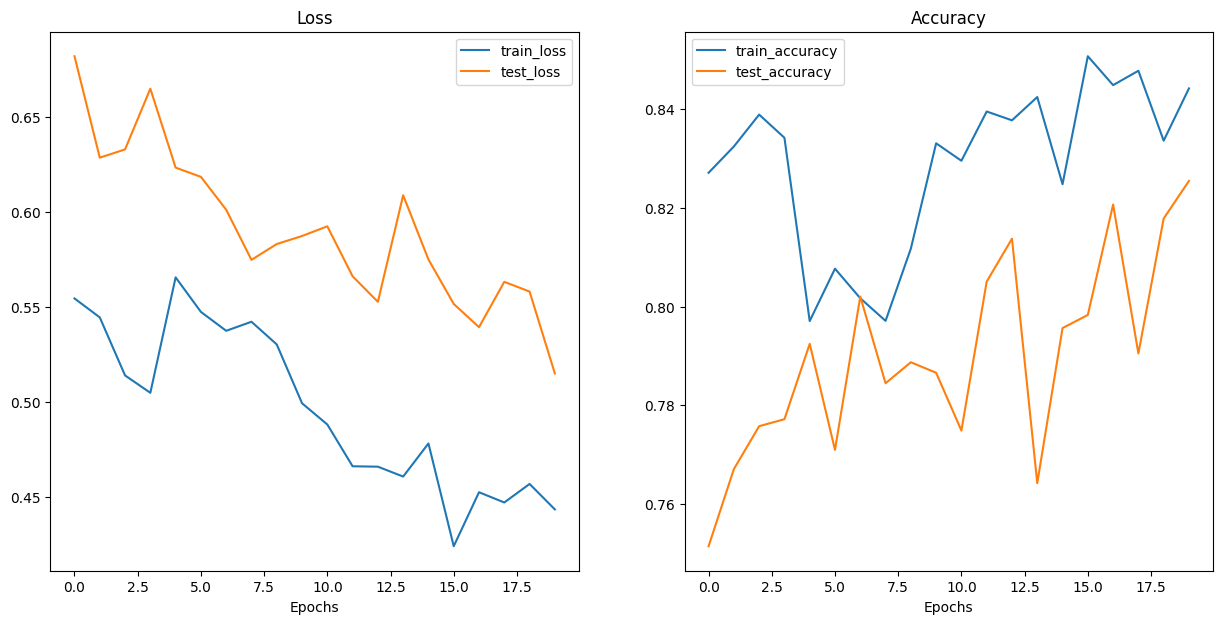

In [95]:
plot_loss_curves(pretrained_model_resnet50_results)

## 9.6 Make predictions on images from the test set

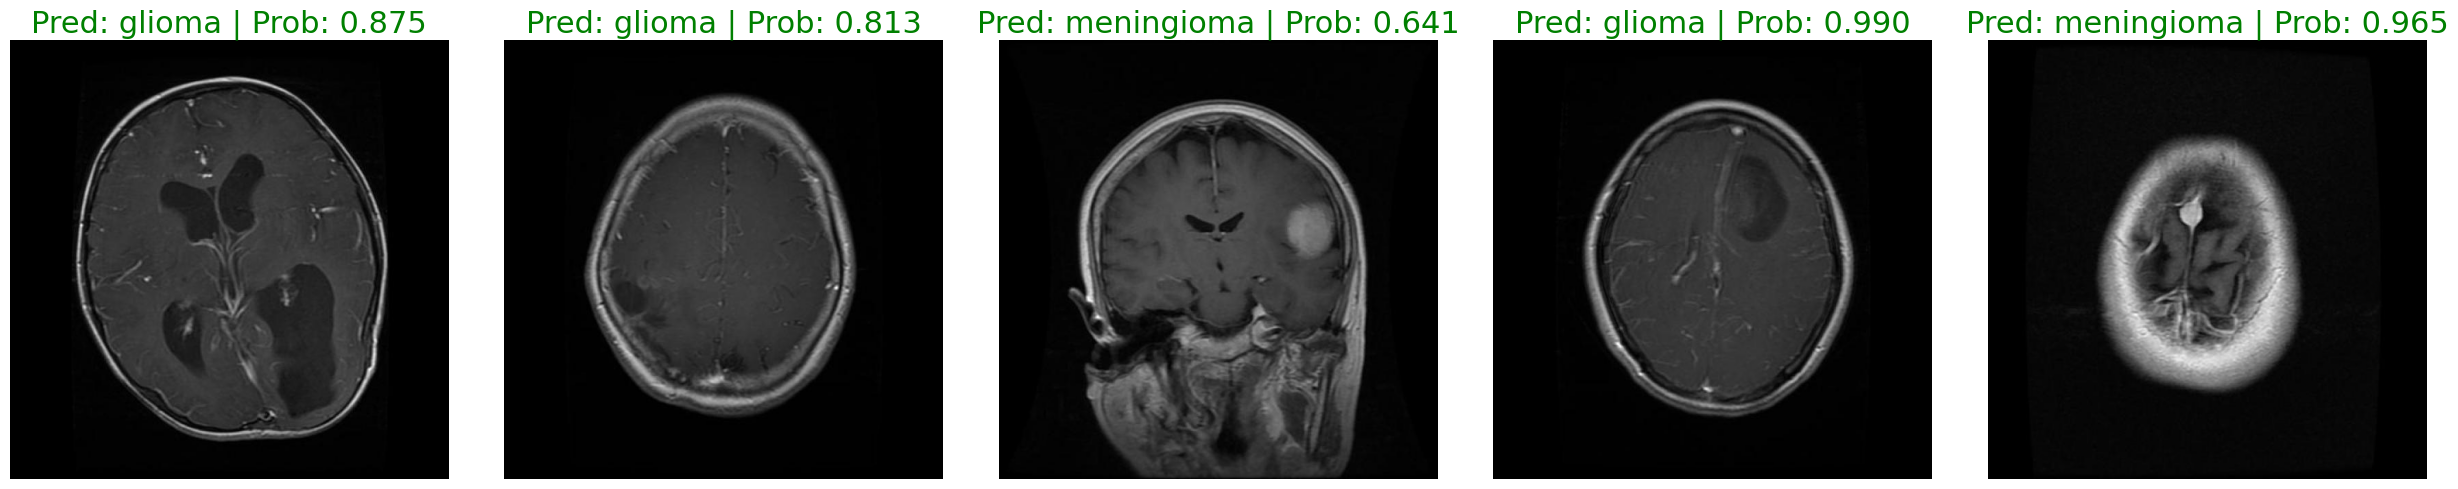

In [109]:
pred_and_plot_image(pretrained_model_resnet50, image_path, class_names, k=5, seed=1201)

## 9.7 Calculating Accuracy score, presicion, recall and f1-score for resnet50 model

In [112]:
# Accuracy
accuracy = accuracy_score(all_labels, all_preds)

# Precision, Recall, F1
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")

Accuracy : 81.08%
Precision: 81.66%
Recall   : 81.08%
F1 Score : 81.28%


## 9.8 Plotting confusion matrix for resnet50 model

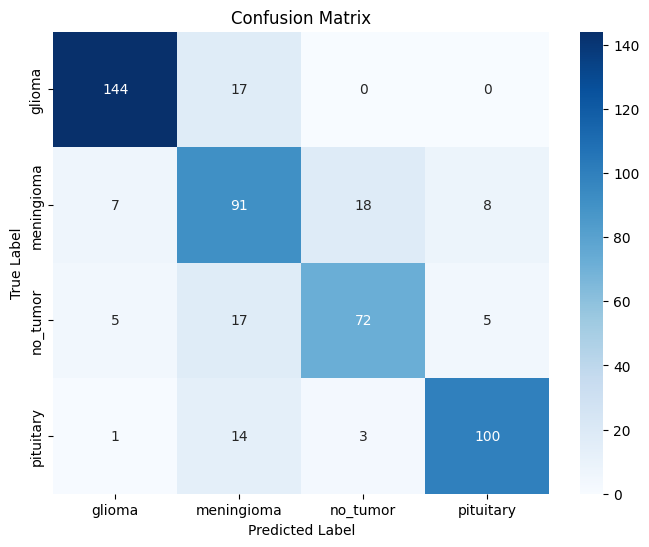

In [113]:
import seaborn as sns
# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plotting it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 10 Transfer learning Part-2 (EfficientNet_B0)

In [145]:
import torch
import torchvision

## 10.1 Setting up pretrained model

In [146]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
pretrained_model_efficientB0 = torchvision.models.efficientnet_b0(weights=weights).to(device)
pretrained_model_efficientB0

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [147]:
pretrained_model_efficientB0.features

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (1): Sequential(
    (0): MBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (activation): SiLU(inplace=True)
          (scale_activation): Sigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), 

In [148]:
pretrained_model_efficientB0.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

# 10.2 Getting summary of EfficientnetB0 model

In [149]:
# Print with torchinfo
from torchinfo import summary

summary(model=pretrained_model_efficientB0,
        input_size=(1,3,224,224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

## 10.3 Freezing the feature layer

In [150]:
for params in pretrained_model_efficientB0.features.parameters():
    params.requires_grad = False

In [151]:
pretrained_model_efficientB0.classifier = nn.Sequential(
    nn.Dropout(p=0.25),
    nn.Linear(in_features=1280, out_features=len(class_names))
).to(device)
pretrained_model_efficientB0.classifier

Sequential(
  (0): Dropout(p=0.25, inplace=False)
  (1): Linear(in_features=1280, out_features=4, bias=True)
)

## 10.4 Train the model

In [152]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(pretrained_model_efficientB0.parameters(), lr=0.001)

In [153]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
pretrained_model_efficientnetb0_results =  train(model=pretrained_model_efficientB0,
                                           train_dataloader=train_dataloader,
                                           test_dataloader=valid_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           epochs=20,
                                           device=device)

# ENd the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time - start_time:.3f} seconds")

  5%|▌         | 1/20 [00:26<08:32, 26.96s/it]

Epoch: 1 | Train Loss: 1.0742 | Train acc: 0.5439 | Test Loss: 1.2670 | Test acc: 0.4474


 10%|█         | 2/20 [00:53<07:55, 26.44s/it]

Epoch: 2 | Train Loss: 0.8199 | Train acc: 0.6915 | Test Loss: 0.7636 | Test acc: 0.7180


 15%|█▌        | 3/20 [01:21<07:42, 27.21s/it]

Epoch: 3 | Train Loss: 0.7293 | Train acc: 0.7174 | Test Loss: 0.7151 | Test acc: 0.7170


 20%|██        | 4/20 [01:48<07:15, 27.22s/it]

Epoch: 4 | Train Loss: 0.6804 | Train acc: 0.7487 | Test Loss: 0.7056 | Test acc: 0.6969


 25%|██▌       | 5/20 [02:15<06:47, 27.19s/it]

Epoch: 5 | Train Loss: 0.6600 | Train acc: 0.7433 | Test Loss: 0.6745 | Test acc: 0.7305


 30%|███       | 6/20 [02:43<06:26, 27.59s/it]

Epoch: 6 | Train Loss: 0.6640 | Train acc: 0.7421 | Test Loss: 0.6436 | Test acc: 0.7482


 35%|███▌      | 7/20 [03:10<05:55, 27.37s/it]

Epoch: 7 | Train Loss: 0.6408 | Train acc: 0.7657 | Test Loss: 0.6167 | Test acc: 0.7493


 40%|████      | 8/20 [03:35<05:18, 26.56s/it]

Epoch: 8 | Train Loss: 0.6462 | Train acc: 0.7575 | Test Loss: 0.6568 | Test acc: 0.7376


 45%|████▌     | 9/20 [03:59<04:42, 25.66s/it]

Epoch: 9 | Train Loss: 0.6313 | Train acc: 0.7616 | Test Loss: 0.6389 | Test acc: 0.7445


 50%|█████     | 10/20 [04:24<04:14, 25.44s/it]

Epoch: 10 | Train Loss: 0.6283 | Train acc: 0.7576 | Test Loss: 0.5850 | Test acc: 0.7669


 55%|█████▌    | 11/20 [04:50<03:51, 25.78s/it]

Epoch: 11 | Train Loss: 0.6194 | Train acc: 0.7705 | Test Loss: 0.6421 | Test acc: 0.7425


 60%|██████    | 12/20 [05:17<03:27, 25.97s/it]

Epoch: 12 | Train Loss: 0.6055 | Train acc: 0.7605 | Test Loss: 0.5811 | Test acc: 0.8018


 65%|██████▌   | 13/20 [05:42<03:01, 25.89s/it]

Epoch: 13 | Train Loss: 0.6107 | Train acc: 0.7653 | Test Loss: 0.6104 | Test acc: 0.7786


 70%|███████   | 14/20 [06:09<02:36, 26.11s/it]

Epoch: 14 | Train Loss: 0.6056 | Train acc: 0.7740 | Test Loss: 0.6586 | Test acc: 0.7484


 75%|███████▌  | 15/20 [06:36<02:12, 26.40s/it]

Epoch: 15 | Train Loss: 0.6300 | Train acc: 0.7658 | Test Loss: 0.6507 | Test acc: 0.7298


 80%|████████  | 16/20 [06:59<01:41, 25.46s/it]

Epoch: 16 | Train Loss: 0.6020 | Train acc: 0.7681 | Test Loss: 0.6382 | Test acc: 0.7580


 85%|████████▌ | 17/20 [07:25<01:16, 25.56s/it]

Epoch: 17 | Train Loss: 0.5872 | Train acc: 0.7658 | Test Loss: 0.6374 | Test acc: 0.7658


 90%|█████████ | 18/20 [07:50<00:50, 25.43s/it]

Epoch: 18 | Train Loss: 0.5993 | Train acc: 0.7817 | Test Loss: 0.6535 | Test acc: 0.7475


 95%|█████████▌| 19/20 [08:15<00:25, 25.28s/it]

Epoch: 19 | Train Loss: 0.5753 | Train acc: 0.7823 | Test Loss: 0.6315 | Test acc: 0.7328


100%|██████████| 20/20 [08:41<00:00, 26.07s/it]

Epoch: 20 | Train Loss: 0.5641 | Train acc: 0.7917 | Test Loss: 0.6389 | Test acc: 0.7502
[INFO] Total training time: 521.404 seconds


In [155]:
pretrained_model_efficientnetb0_results

{'train_loss': [1.074170118232943,
  0.8198555258085143,
  0.7293251960907342,
  0.6803829557490799,
  0.6599511970888894,
  0.6639865619956322,
  0.6408217875462658,
  0.6461535332337865,
  0.6313121228847863,
  0.6282926539205155,
  0.6194371356154388,
  0.6055240119403263,
  0.6107340483170636,
  0.6055627746402092,
  0.6300377508379379,
  0.6019787799637273,
  0.5871974612182042,
  0.5992813959436597,
  0.5752735317878004,
  0.5641318064815594],
 'train_acc': [0.5439363968350578,
  0.6914942178940962,
  0.7173995739500914,
  0.7486876141205112,
  0.7433239500912965,
  0.7421447048082775,
  0.7656535301278149,
  0.7575319537431527,
  0.7616212720632989,
  0.7576080340839928,
  0.7705226719415703,
  0.7604800669506999,
  0.7652731284236154,
  0.7740223676202069,
  0.7658247108947047,
  0.7681451612903226,
  0.7658437309799148,
  0.7816874619598296,
  0.782296104686549,
  0.79171104686549],
 'test_loss': [1.2670231722295284,
  0.7635538801550865,
  0.7150654662400484,
  0.705601237714

## 10.5 Plot loss curves

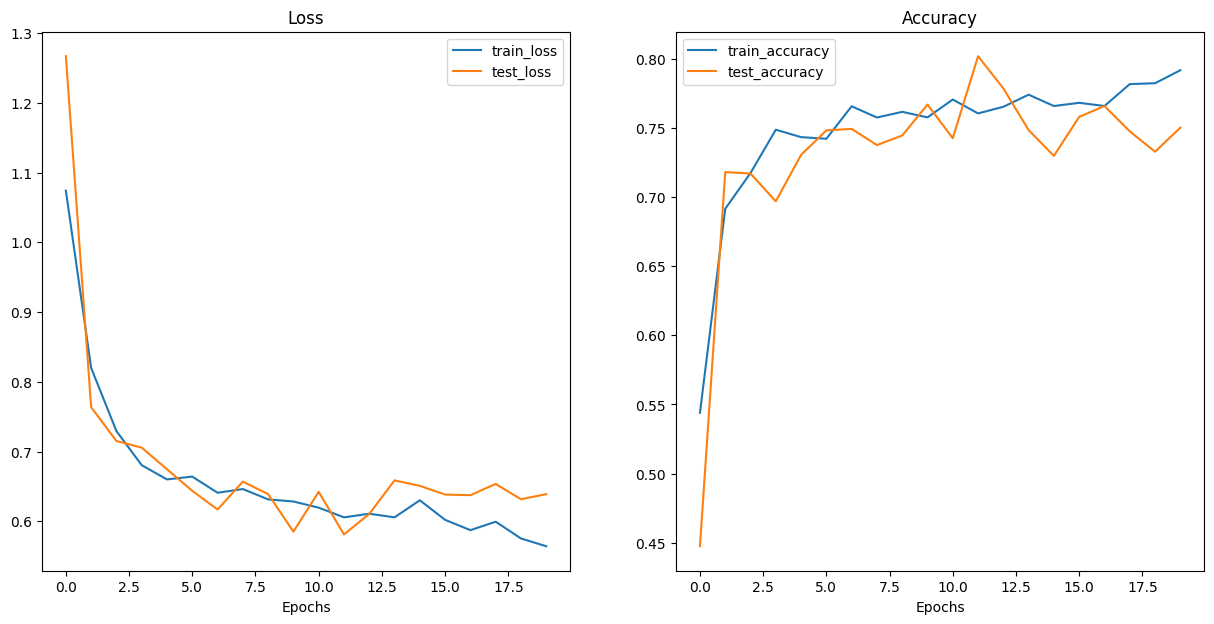

In [157]:
plot_loss_curves(pretrained_model_efficientnetb0_results)

## 10.6 Making prediction on the test images

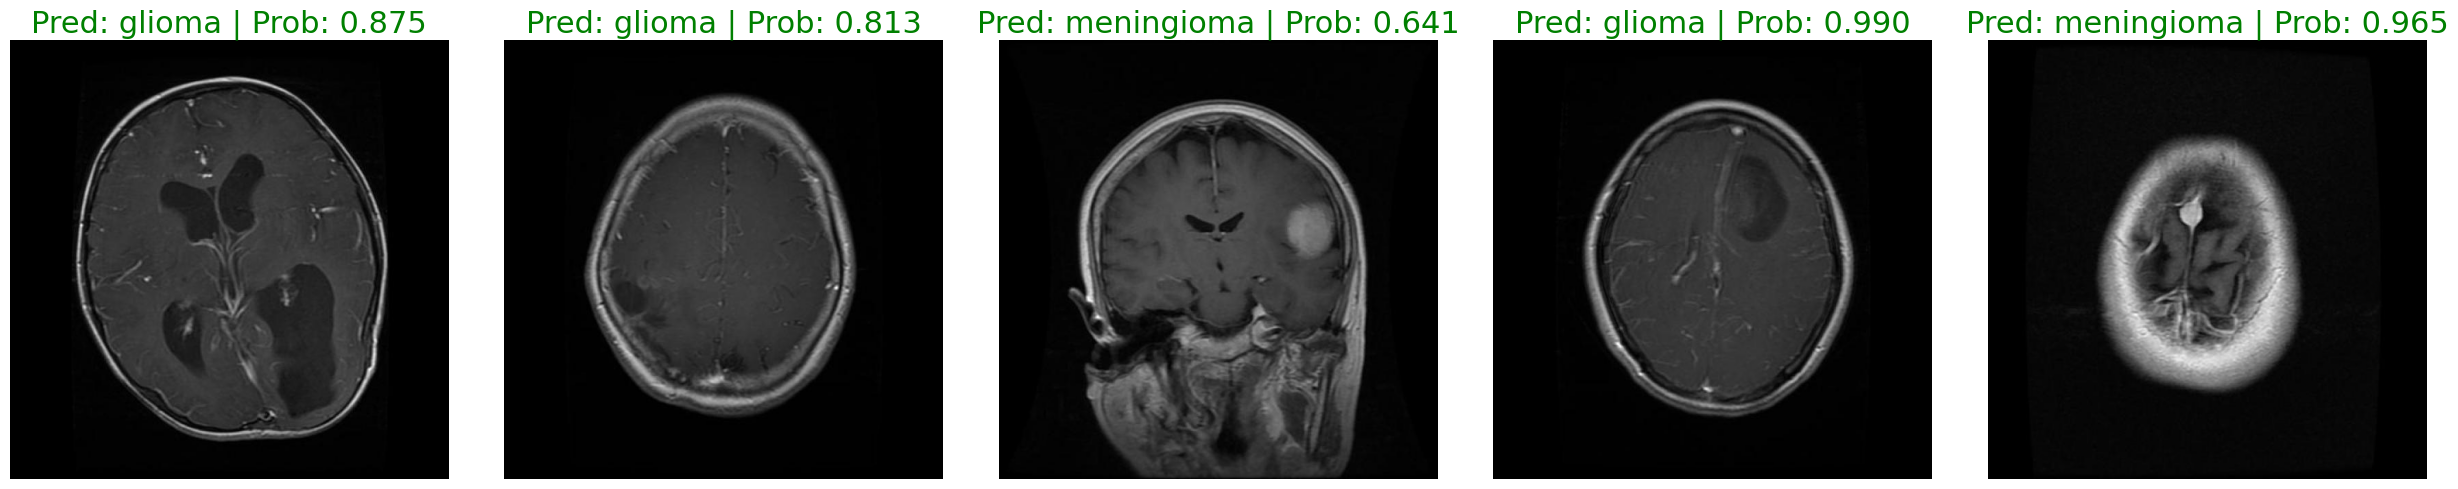

In [158]:
pred_and_plot_image(pretrained_model_resnet50, image_path, class_names, k=5, seed=1201)

## 10.7 Calculating accuracy score, precision, recall, f1_score

In [159]:
# Accuracy
accuracy = accuracy_score(all_labels, all_preds)

# Precision, Recall, F1
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")

Accuracy : 81.08%
Precision: 81.66%
Recall   : 81.08%
F1 Score : 81.28%


## 10.8 Plotting confusion matrix

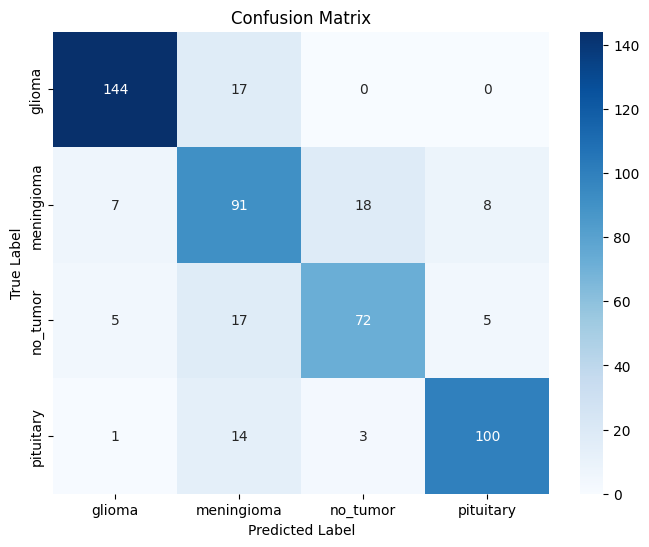

In [160]:
import seaborn as sns
# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plotting it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 11 Final Verdict:- 
1) All models works more or less on same level of accuracy
2) Average accuracy score (all four models) :- ~80%
3) Resnet50 works little bit best among other three, also it reduced overfitting, and improved accuracy a bit

# 12. Saving and Loading best models

## 12.1 ResNet50

In [162]:
# Saving the model using .save()
torch.save(pretrained_model_resnet50.state_dict(), "resnet50_brain_model.pth")

# Loading the model
pretrained_model_resnet50.load_state_dict(torch.load("resnet50_brain_model.pth"))

C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_15192\1996380896.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_model_resnet50.load_state_dict(torch.load("

<All keys matched successfully>

## 12.2 Custom_model_2

In [163]:
# Saving the model using .save()
torch.save(custom_model_2.state_dict(), "custom_model_2.pth")

# Loading the model
custom_model_2.load_state_dict(torch.load("custom_model_2.pth"))

C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_15192\800190043.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  custom_model_2.load_state_dict(torch.load("custom_model

<All keys matched successfully>